## Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Описание тарифов
Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
o	минута разговора: 3 рубля
o	сообщение: 3 рубля
o	1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
o	минута разговора: 1 рубль
o	сообщение: 1 рубль
o	1 Гб интернет-трафика: 150 рублей
Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


## Изучение данных из файлов

In [1]:
# импорт библиотк
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from scipy import stats as st

In [2]:
# задаем переменные, в которы помещаем данные из файлов
df_calls = pd.read_csv("https://code.s3.yandex.net/datasets/calls.csv")
df_internet = pd.read_csv("https://code.s3.yandex.net/datasets/internet.csv")
df_messages = pd.read_csv("https://code.s3.yandex.net/datasets/messages.csv")
df_tariffs = pd.read_csv("https://code.s3.yandex.net/datasets/tariffs.csv")
df_users = pd.read_csv("https://code.s3.yandex.net/datasets/users.csv")

In [3]:
print('\033[1m' + 'Calls' + '\033[0m')
display(df_calls.head(5))
print('Дубликаты', len(df_calls[df_calls.duplicated()]))
print()
df_calls.info()

Calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Дубликаты 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


пропуски отсутствуют

In [4]:
print('\033[1m' + 'Internet' + '\033[0m')
display(df_internet.head(5))
print('Дубликаты', len(df_internet[df_internet.duplicated()]))
print()
df_internet.info()

Internet


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Дубликаты 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


пропуски отсутствуют

пропуски отсутствуют

In [5]:
print('\033[1m' + 'Messages' + '\033[0m')
display(df_messages.head(5))
print('Дубликаты', len(df_messages[df_messages.duplicated()]))
print()
df_messages.info()

Messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Дубликаты 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


пропуски отсутствуют

In [6]:
print('\033[1m' + 'Tariffs' + '\033[0m')
display(df_tariffs.head(5))
print('Дубликаты', len(df_tariffs[df_tariffs.duplicated()]))
print()
df_tariffs.info()

Tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Дубликаты 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
print('\033[1m' + 'Users' + '\033[0m')
display(df_users.head(5))
print('Дубликаты', len(df_users[df_users.duplicated()]))
print()
df_users.info()

Users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Дубликаты 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


присутствуют пропуски в данных о дате отказа клиента от услуг

**Вывод:**
- представлены 5 файлов
- дубликаты отсутствуют
- в фале пользователей отсутствуют данные о дате окончании пользования услугами


## Подготовка данных к нужным типам

Для решения задачи необходимы следующие данные:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


Будут проведени следующие преобразования:
* израсходованные минуты  - приведение к целочисленному формату с округлением в большую сторону
* объем израсходованного интернет-трафика - приведение к целочисленному формату с округлением в большую сторону
* выделение из даты значения месяца

### Минуты звонков и трафик - к целым значениям, а также округлим в соответствии с условиями тарифа

In [8]:
# израсходованные минуты - приведение к целочисленному формату с округлением в большую сторону
df_calls.duration = np.ceil(df_calls.duration).astype('int')

# объем израсходованного интернет-трафика - приведение к целочисленному формату с округлением в большую сторону
df_internet.mb_used = df_internet.mb_used.astype('int')

### Выделение из даты значения месяца

#### Интернет

In [9]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')  # обозначение формата даты
df_internet['month'] = df_internet['session_date'].dt.month
df_internet = df_internet.drop('Unnamed: 0', axis=1)
df_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112,2018-11-25,1000,11
1,1000_1,1052,2018-09-07,1000,9
2,1000_2,1197,2018-06-25,1000,6
3,1000_3,550,2018-08-22,1000,8
4,1000_4,302,2018-09-24,1000,9


#### Звонки

In [10]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')  # обозначение формата даты
df_calls['month'] = df_calls['call_date'].dt.month
df_calls = df_calls.drop('id', axis=1)
df_calls.head(2)

,call_date,duration,user_id,month
0,2018-07-25,0,1000,7
1,2018-08-17,0,1000,8


#### Сообщения

In [11]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')  # обозначение формата даты
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


#### Расчет кол-ва месяцев пользоания услугами

1. рассмотрим случай, когда оплата взымается в конце колендарного месяца пропорционально прошедшим дням с предыдущего расчетного периода
2. примем кол-во дней в месяце равным 30
3. выясним, сколько месяцев клиент пользовался услугами в отчетный период
4. если клиент не отказался от услуг в отчетный период, для отчета зададим дату отказа как дату, следующую за последним днем отчетного периода

In [12]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')  # обозначение формата даты
df_users = df_users.drop(['age', 'first_name', 'last_name'], axis=1)
df_users

,user_id,churn_date,city,reg_date,tariff
0,1000,NaN,Краснодар,2018-05-25,ultra
1,1001,NaN,Москва,2018-11-01,smart
2,1002,NaN,Стерлитамак,2018-06-17,smart
3,1003,NaN,Москва,2018-08-17,ultra
4,1004,NaN,Новокузнецк,2018-05-14,ultra
...,...,...,...,...,...
495,1495,NaN,Иркутск,2018-08-28,ultra
496,1496,NaN,Вологда,2018-01-27,smart
497,1497,NaN,Челябинск,2018-10-09,smart
498,1498,2018-10-25,Владикавказ,2018-07-19,smart


In [13]:
print('Кол-во отказников:',df_users.churn_date.notna().sum())

Кол-во отказников: 38


In [14]:
print('Кол-во пользователей по годам регастраци:', df_users['reg_date'].dt.year.value_counts())

Кол-во пользователей по годам регастраци: 2018    500
Name: reg_date, dtype: int64


In [15]:
print('Кол-во клиентов, продолжающих пользоваться услугами: ', df_users.churn_date.isna().sum())

Кол-во клиентов, продолжающих пользоваться услугами:  462


все клиенты зарегистрировались в 2018 году, 38 из них отказались от услуг в этом же году

In [16]:
pd.set_option('display.max_rows', 10)
# df_users['reg_year'] = df_users['reg_date'].dt.year        # год регистрации
# df_users['reg_month'] = df_users['reg_date'].dt.month      # месяца регистрации
end_date = datetime(year=2019, month=1, day=1)                              # опорная дата для отчетного периода
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users.churn_date = df_users.churn_date.fillna(end_date)                  # опорная дата для пропусков в отч.период
df_users['days_usage'] = df_users['churn_date'] - df_users['reg_date']      # кол-во дней пользования
df_users['days_usage'] = df_users['days_usage'].dt.days                     # числовая размерность
df_users['months_usage'] = np.ceil(df_users['days_usage'] / 30.5)           # подсчет кол-ва месяцев пользования
print('\033[1m' + 'Обновленная таблица пользователей' + '\033[0m')
df_users = df_users.sort_values('user_id')
df_users.head(100)

Обновленная таблица пользователей


,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0
1,1001,2019-01-01,Москва,2018-11-01,smart,61,2.0
2,1002,2019-01-01,Стерлитамак,2018-06-17,smart,198,7.0
3,1003,2019-01-01,Москва,2018-08-17,ultra,137,5.0
4,1004,2019-01-01,Новокузнецк,2018-05-14,ultra,232,8.0
...,...,...,...,...,...,...,...
95,1095,2019-01-01,Новосибирск,2018-12-23,smart,9,1.0
96,1096,2019-01-01,Брянск,2018-04-01,ultra,275,10.0
97,1097,2019-01-01,Краснодар,2018-06-25,ultra,190,7.0
98,1098,2019-01-01,Челябинск,2018-06-23,smart,192,7.0


### Количество сделанных звонков и израсходованных минут разговора в месяц для каждого пользователя

In [17]:
# получение данных по звонкам для всех пользователей
df_calls_all = df_users.merge(df_calls, on='user_id', suffixes=['','_r'], how='outer')
display(df_calls_all.head())
print(f'Кол-во пользователей, не использовавших голосовой трафик: {df_calls_all.duration.isna().sum() / 500*100}%')
df_calls_all.query('duration.isna()', engine='python')

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,call_date,duration,month
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,2018-07-25,0.0,7.0
1,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,2018-08-17,0.0,8.0
2,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,2018-06-11,3.0,6.0
3,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,2018-09-21,14.0,9.0
4,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,2018-12-15,6.0,12.0


Кол-во пользователей, не использовавших голосовой трафик: 1.6%


,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,call_date,duration,month
36344,1091,2019-01-01,Набережные Челны,2018-05-08,ultra,238,8.0,NaT,NaN,NaN
42758,1106,2019-01-01,Калуга,2018-04-26,ultra,250,9.0,NaT,NaN,NaN
51654,1128,2018-12-23,Волжский,2018-12-15,ultra,8,1.0,NaT,NaN,NaN
92592,1231,2019-01-01,Чебоксары,2018-05-23,ultra,223,8.0,NaT,NaN,NaN
127924,1328,2019-01-01,Мурманск,2018-10-16,ultra,77,3.0,NaT,NaN,NaN
145827,1371,2018-12-30,Омск,2018-12-25,smart,5,1.0,NaT,NaN,NaN
193093,1473,2019-01-01,Красноярск,2018-08-05,ultra,149,5.0,NaT,NaN,NaN
198661,1489,2019-01-01,Санкт-Петербург,2018-08-15,smart,139,5.0,NaT,NaN,NaN


In [18]:
# получение данных по интернет трафику для всех пользователей
df_internet_all = df_users.merge(df_internet, on='user_id', how='outer')
display(df_internet_all.head())
print(f'Кол-во пользователей, не использовавших интернет трафик: {df_internet_all.session_date.isna().sum() / 500*100}%')
df_internet_all = df_internet_all.sort_values('user_id')
df_internet_all.query('session_date.isna()', engine='python')

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,id,mb_used,session_date,month
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,1000_0,112.0,2018-11-25,11.0
1,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,1000_1,1052.0,2018-09-07,9.0
2,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,1000_2,1197.0,2018-06-25,6.0
3,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,1000_3,550.0,2018-08-22,8.0
4,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,1000_4,302.0,2018-09-24,9.0


Кол-во пользователей, не использовавших интернет трафик: 0.6%


,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,id,mb_used,session_date,month
37050,1128,2018-12-23,Волжский,2018-12-15,ultra,8,1.0,NaN,NaN,NaT,NaN
80796,1273,2019-01-01,Курган,2018-05-15,ultra,231,8.0,NaN,NaN,NaT,NaN
108634,1371,2018-12-30,Омск,2018-12-25,smart,5,1.0,NaN,NaN,NaT,NaN


In [19]:
# получение данных по СМС для всех пользователей
df_messages_all = df_users.merge(df_messages, on='user_id', how='outer')
display(df_messages_all.head())
df_messages_all
print(f'Кол-во пользователей, не использовавших SMS: {df_messages_all.message_date.isna().sum() / 500*100}%')
df_messages_all.query('message_date.isna()', engine='python').head()

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,id,message_date,month
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,1000_0,2018-06-27,6.0
1,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,1000_1,2018-10-08,10.0
2,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,1000_2,2018-08-04,8.0
3,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,1000_3,2018-06-16,6.0
4,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,1000_4,2018-12-05,12.0


Кол-во пользователей, не использовавших SMS: 14.799999999999999%


,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,id,message_date,month
496,1001,2019-01-01,Москва,2018-11-01,smart,61,2.0,NaN,NaT,NaN
2691,1006,2019-01-01,Ульяновск,2018-02-26,smart,309,11.0,NaN,NaT,NaN
3083,1010,2019-01-01,Тюмень,2018-08-05,smart,149,5.0,NaN,NaT,NaN
4465,1017,2019-01-01,Краснодар,2018-05-22,smart,224,8.0,NaN,NaT,NaN
5770,1024,2019-01-01,Санкт-Петербург,2018-10-31,ultra,62,3.0,NaN,NaT,NaN


In [20]:
# Количество звонков в месяц для каждого пользователя
user_calls_by_month_count = pd.pivot_table(df_calls_all, index=['user_id','tariff'], columns=['month'],
                                     values='duration', aggfunc=['count'])
user_calls_by_month_count.columns = ['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec']
print()
print('\033[1m' + 'Количество звонков в месяц для каждого пользователя' + '\033[0m')
user_calls_by_month_count['total_calls'] = user_calls_by_month_count.loc[:,'jan':'dec'].sum(axis=1)
user_calls_by_month_count = user_calls_by_month_count.fillna(0)

# добавление кол-ва месяцев пользования
user_calls_by_month_count = user_calls_by_month_count.reset_index()
user_calls_by_month_count['months_usage'] = df_users['months_usage']

# добавление среднего кол-ва звонков
user_calls_by_month_count['mean_calls'] = user_calls_by_month_count['total_calls'] / user_calls_by_month_count['months_usage']
display(user_calls_by_month_count.head())
print('\033[1m' + 'Среднее кол-во звонков в месяц:' + '\033[0m', np.ceil(user_calls_by_month_count['mean_calls'].mean()))


Количество звонков в месяц для каждого пользователя


,user_id,tariff,jan,feb,march,apr,may,june,july,aug,sep,oct,nov,dec,total_calls,months_usage,mean_calls
0,1000,ultra,0.0,0.0,0.0,0.0,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0,368.0,8.0,46.0
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,63.0,122.0,2.0,61.0
2,1002,smart,0.0,0.0,0.0,0.0,0.0,15.0,26.0,42.0,36.0,33.0,32.0,33.0,217.0,7.0,31.0
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,134.0,108.0,115.0,108.0,520.0,5.0,104.0
4,1004,ultra,0.0,0.0,0.0,0.0,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0,176.0,8.0,22.0


Среднее кол-во звонков в месяц: 101.0


In [21]:
user_calls_by_month_dur = pd.pivot_table(df_calls_all, index=['user_id','tariff'], columns='month',
                                     values='duration', aggfunc='sum')
user_calls_by_month_dur.columns = ['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec']
print()
print('\033[1m' + 'Голосовой трафик в минутах в месяц для каждого пользователя' + '\033[0m')
user_calls_by_month_dur['total_minutes'] = user_calls_by_month_dur.loc[:,'jan':'dec'].sum(axis=1)
user_calls_by_month_dur = user_calls_by_month_dur.fillna(0)

# добавление кол-ва месяцев пользования
user_calls_by_month_dur = user_calls_by_month_dur.reset_index()
user_calls_by_month_dur['months_usage'] = df_users['months_usage']

# добавление среднего продолжительности звонков
user_calls_by_month_dur['mean_minutes'] = \
        np.ceil(user_calls_by_month_dur['total_minutes'] / user_calls_by_month_dur['months_usage'])
display(user_calls_by_month_dur.head())
print('\033[1m' + 'Среднея продолжительность звонков в месяц:' + '\033[0m', np.ceil(user_calls_by_month_dur.mean_minutes.mean()))


Голосовой трафик в минутах в месяц для каждого пользователя


,user_id,tariff,jan,feb,march,apr,may,june,july,aug,sep,oct,nov,dec,total_minutes,months_usage,mean_minutes
0,1000,ultra,0.0,0.0,0.0,0.0,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,2566.0,8.0,321.0
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,414.0,844.0,2.0,422.0
2,1002,smart,0.0,0.0,0.0,0.0,0.0,117.0,214.0,289.0,206.0,212.0,243.0,236.0,1517.0,7.0,217.0
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380.0,961.0,855.0,824.0,802.0,3822.0,5.0,765.0
4,1004,ultra,0.0,0.0,0.0,0.0,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0,987.0,8.0,124.0


Среднея продолжительность звонков в месяц: 725.0


### Количество отправленных сообщений по месяцам для каждого пользователя

In [22]:
user_messages_by_month = pd.pivot_table(df_messages_all, index=['user_id','tariff'], columns='month',
                                     values='id', aggfunc='count')
user_messages_by_month.columns = ['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec']
print()
print('\033[1m' + 'Кол-во сообщений в месяц для каждого пользователя' + '\033[0m')
user_messages_by_month['total_messages'] = user_messages_by_month.loc[:,'jan':'dec'].sum(axis=1)
user_messages_by_month = user_messages_by_month.fillna(0)

# добавление месяца
user_messages_by_month = user_messages_by_month.reset_index()
user_messages_by_month['months_usage'] = df_users['months_usage']

# добавление среднего кол-ва сообщений
user_messages_by_month['mean_messages'] = \
        np.ceil(user_messages_by_month['total_messages'] / user_messages_by_month['months_usage'])

display(user_messages_by_month.head())
print('\033[1m' + 'Среднее кол-во СМС в месяц:' + '\033[0m', np.ceil(user_messages_by_month['mean_messages'].mean()))


Кол-во сообщений в месяц для каждого пользователя


,user_id,tariff,jan,feb,march,apr,may,june,july,aug,sep,oct,nov,dec,total_messages,months_usage,mean_messages
0,1000,ultra,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,496.0,8.0,62.0
1,1002,smart,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0,70.0,2.0,35.0
2,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0,380.0,7.0,55.0
3,1004,ultra,0.0,0.0,0.0,0.0,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,1192.0,5.0,239.0
4,1005,smart,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0,552.0,8.0,69.0


Среднее кол-во СМС в месяц: 71.0


### Объем расходованного интернет-трафика по месяцам для каждого пользователя

In [23]:
user_internet_by_month = pd.pivot_table(df_internet_all, index=['user_id','tariff'], columns='month',
                                     values='mb_used', aggfunc='sum')
user_internet_by_month.columns = ['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec']
user_internet_by_month = np.ceil(user_internet_by_month / 1024)   # кол-во Гб, округление вверх
print()
print('\033[1m' + 'Объем интернет трафика в месяц для каждого пользователя' + '\033[0m')
user_internet_by_month['total_mobile_traffic'] = user_internet_by_month.loc[:,'jan':'dec'].sum(axis=1)
user_internet_by_month = user_internet_by_month.fillna(0)

# добавление месяца
user_internet_by_month = user_internet_by_month.reset_index()
user_internet_by_month['months_usage'] = df_users['months_usage']
user_internet_by_month['mean_mobile_traffic'] = \
        np.ceil(user_internet_by_month['total_mobile_traffic'] / user_internet_by_month['months_usage'])

display(user_internet_by_month.head())
print('\033[1m' + 'Среднее кол-во интернет-трафика в Гб в месяц:' + '\033[0m', np.ceil(user_internet_by_month.mean_mobile_traffic.mean()))


Объем интернет трафика в месяц для каждого пользователя


,user_id,tariff,jan,feb,march,apr,may,june,july,aug,sep,oct,nov,dec,total_mobile_traffic,months_usage,mean_mobile_traffic
0,1000,ultra,0.0,0.0,0.0,0.0,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,109.0,8.0,14.0
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,14.0,32.0,2.0,16.0
2,1002,smart,0.0,0.0,0.0,0.0,0.0,11.0,18.0,20.0,17.0,14.0,19.0,18.0,117.0,7.0,17.0
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,13.0,15.0,12.0,10.0,59.0,5.0,12.0
4,1004,ultra,0.0,0.0,0.0,0.0,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0,150.0,8.0,19.0


Среднее кол-во интернет-трафика в Гб в месяц: 26.0


**Вывод:**
- заполнены пропуски
- из 500 клиентов 38 отказались от услуг
- 462 на конец 2018г. продолжают пользоваться услугами
- все были зарегистрированы в 2018 году
- 1,6% не пользовались звонками
- 0,6% клиента не пользовались интернетом
- 14,8%  не пользовались СМС
- среднее кол-во звонков в месяц: 412
- среднея продолжительность звонков в месяц: 2948
- среднее кол-во СМС в месяц: 289
- среднее кол-во интернет-трафика в Гб в месяц: 112


## Траты пользователей по тарифам

### Траты пользователей на интернет сверх тарифа

Определим ф-ции для расчета трат:

In [24]:
def func_internet_smart(x):
    if x <= 15:
        return 0
    else: return np.ceil(x - 15) * 200
    
   
def func_internet_ultra(x):
    if x <= 30:
        return 0
    else:
        return np.ceil(x - 30) * 150

In [25]:
# ui - таблица для пользователей и интернет трафика по месяцам на основе user_id
df_ui = pd.merge(df_users, user_internet_by_month, on=['user_id'], suffixes=['','_r'], how='outer')
df_ui = df_ui.fillna(0)
df_ui = df_ui.sort_values('user_id')
df_ui = df_ui.reset_index(drop=True)
df_ui.head()

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,june,july,aug,sep,oct,nov,dec,total_mobile_traffic,months_usage_r,mean_mobile_traffic
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,ultra,0.0,0.0,...,23.0,14.0,14.0,15.0,15.0,15.0,10.0,109.0,8.0,14.0
1,1001,2019-01-01,Москва,2018-11-01,smart,61,2.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.0,14.0,32.0,2.0,16.0
2,1002,2019-01-01,Стерлитамак,2018-06-17,smart,198,7.0,smart,0.0,0.0,...,11.0,18.0,20.0,17.0,14.0,19.0,18.0,117.0,7.0,17.0
3,1003,2019-01-01,Москва,2018-08-17,ultra,137,5.0,ultra,0.0,0.0,...,0.0,0.0,9.0,13.0,15.0,12.0,10.0,59.0,5.0,12.0
4,1004,2019-01-01,Новокузнецк,2018-05-14,ultra,232,8.0,ultra,0.0,0.0,...,18.0,22.0,28.0,15.0,19.0,16.0,18.0,150.0,8.0,19.0


Расчитаем траты клиентов на интернет сверх тарифных пределов: 
* для тарифа ultra
* для тарифа smart

In [26]:
df_internet_ultra = df_ui.query('tariff == "ultra"')            # выделение тарифа
df_internet_ultra = df_internet_ultra.sort_values('user_id')
df_internet_ultra = df_internet_ultra.reset_index(drop=True)
df_internet_ultra.head()

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,june,july,aug,sep,oct,nov,dec,total_mobile_traffic,months_usage_r,mean_mobile_traffic
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,ultra,0.0,0.0,...,23.0,14.0,14.0,15.0,15.0,15.0,10.0,109.0,8.0,14.0
1,1003,2019-01-01,Москва,2018-08-17,ultra,137,5.0,ultra,0.0,0.0,...,0.0,0.0,9.0,13.0,15.0,12.0,10.0,59.0,5.0,12.0
2,1004,2019-01-01,Новокузнецк,2018-05-14,ultra,232,8.0,ultra,0.0,0.0,...,18.0,22.0,28.0,15.0,19.0,16.0,18.0,150.0,8.0,19.0
3,1013,2019-01-01,Иваново,2018-11-14,ultra,48,2.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,21.0,31.0,2.0,16.0
4,1016,2019-01-01,Омск,2018-11-21,ultra,41,2.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,19.0,27.0,2.0,14.0


In [27]:
# # траты по месяцам сверх тарифа
columns = ['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec']
df_internet_ultra = df_internet_ultra.copy()
for column in columns:
    df_internet_ultra[column] = df_internet_ultra[column].apply(func_internet_ultra)
df_internet_ultra['internet_cost'] = df_internet_ultra.loc[:,'jan':'dec'].sum(axis=1)
df_internet_ultra

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,july,aug,sep,oct,nov,dec,total_mobile_traffic,months_usage_r,mean_mobile_traffic,internet_cost
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,ultra,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,109.0,8.0,14.0,0.0
1,1003,2019-01-01,Москва,2018-08-17,ultra,137,5.0,ultra,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,59.0,5.0,12.0,0.0
2,1004,2019-01-01,Новокузнецк,2018-05-14,ultra,232,8.0,ultra,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,150.0,8.0,19.0,0.0
3,1013,2019-01-01,Иваново,2018-11-14,ultra,48,2.0,ultra,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,2.0,16.0,0.0
4,1016,2019-01-01,Омск,2018-11-21,ultra,41,2.0,ultra,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27.0,2.0,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1476,2019-01-01,Москва,2018-04-30,ultra,246,9.0,ultra,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,152.0,5.0,31.0,0.0
145,1485,2019-01-01,Киров,2018-12-29,ultra,3,1.0,ultra,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,11.0,3.0,0.0
146,1491,2019-01-01,Челябинск,2018-04-25,ultra,251,9.0,ultra,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,162.0,2.0,81.0,0.0
147,1493,2019-01-01,Красноярск,2018-11-24,ultra,38,2.0,ultra,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1800.0,54.0,9.0,6.0,1800.0


In [28]:
df_internet_smart = df_ui.query('tariff == "smart"')  # выделение тарифа

In [29]:
# траты по месяцам сверх тарифа
df_internet_smart = df_internet_smart.copy()
for column in columns:
    df_internet_smart[column] = df_internet_smart[column].apply(func_internet_smart)
df_internet_smart['internet_cost'] = df_internet_smart.loc[:,'jan':'dec'].sum(axis=1)
df_internet_smart

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,july,aug,sep,oct,nov,dec,total_mobile_traffic,months_usage_r,mean_mobile_traffic,internet_cost
1,1001,2019-01-01,Москва,2018-11-01,smart,61,2.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,600.0,0.0,32.0,2.0,16.0,600.0
2,1002,2019-01-01,Стерлитамак,2018-06-17,smart,198,7.0,smart,0.0,0.0,...,600.0,1000.0,400.0,0.0,800.0,600.0,117.0,7.0,17.0,3400.0
5,1005,2019-01-01,Набережные Челны,2018-01-25,smart,341,12.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,103.0,12.0,9.0,0.0
6,1006,2019-01-01,Ульяновск,2018-02-26,smart,309,11.0,smart,0.0,0.0,...,1000.0,800.0,200.0,1000.0,0.0,800.0,166.0,11.0,16.0,4200.0
7,1007,2019-01-01,Москва,2018-04-19,smart,257,9.0,smart,0.0,0.0,...,200.0,1200.0,0.0,0.0,200.0,0.0,134.0,9.0,15.0,2200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1494,2019-01-01,Омск,2018-08-17,smart,137,5.0,smart,0.0,0.0,...,0.0,0.0,400.0,600.0,600.0,600.0,78.0,9.0,9.0,2200.0
496,1496,2019-01-01,Вологда,2018-01-27,smart,339,12.0,smart,0.0,2600.0,...,1800.0,1600.0,2400.0,2600.0,2000.0,1200.0,270.0,2.0,135.0,20200.0
497,1497,2019-01-01,Челябинск,2018-10-09,smart,84,3.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1000.0,46.0,5.0,10.0,1000.0
498,1498,2018-10-25,Владикавказ,2018-07-19,smart,98,4.0,smart,0.0,0.0,...,0.0,1800.0,1400.0,1200.0,0.0,0.0,75.0,5.0,15.0,4400.0


In [30]:
df_ic = pd.concat([df_internet_ultra, df_internet_smart])   # объединение таблиц
df_ic = df_ic.sort_values('user_id')
df_ic = df_ic.reset_index(drop=True)
df_ic

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,july,aug,sep,oct,nov,dec,total_mobile_traffic,months_usage_r,mean_mobile_traffic,internet_cost
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,109.0,8.0,14.0,0.0
1,1001,2019-01-01,Москва,2018-11-01,smart,61,2.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,600.0,0.0,32.0,2.0,16.0,600.0
2,1002,2019-01-01,Стерлитамак,2018-06-17,smart,198,7.0,smart,0.0,0.0,...,600.0,1000.0,400.0,0.0,800.0,600.0,117.0,7.0,17.0,3400.0
3,1003,2019-01-01,Москва,2018-08-17,ultra,137,5.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,59.0,5.0,12.0,0.0
4,1004,2019-01-01,Новокузнецк,2018-05-14,ultra,232,8.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,150.0,8.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,2019-01-01,Иркутск,2018-08-28,ultra,126,5.0,ultra,0.0,0.0,...,0.0,0.0,450.0,0.0,1200.0,0.0,126.0,7.0,18.0,1650.0
496,1496,2019-01-01,Вологда,2018-01-27,smart,339,12.0,smart,0.0,2600.0,...,1800.0,1600.0,2400.0,2600.0,2000.0,1200.0,270.0,2.0,135.0,20200.0
497,1497,2019-01-01,Челябинск,2018-10-09,smart,84,3.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1000.0,46.0,5.0,10.0,1000.0
498,1498,2018-10-25,Владикавказ,2018-07-19,smart,98,4.0,smart,0.0,0.0,...,0.0,1800.0,1400.0,1200.0,0.0,0.0,75.0,5.0,15.0,4400.0


### Траты пользователей на зовнки сверх тарифа

In [31]:
def func_calls_smart(x):
    if x < 500:
        return 0
    else: return np.ceil(x - 500) * 3

def func_calls_ultra(x):
    if x < 3000:
        return 0
    else: return np.ceil(x - 3000)

In [32]:
# uc - таблица для пользователей и голосового трафика по месяцам на основе user_id
df_uc = pd.merge(df_users, user_calls_by_month_dur, on=['user_id'], suffixes=['','_r'],   how='outer')
df_uc = df_uc.sort_values('user_id')
df_uc = df_uc.reset_index(drop=True)
df_uc = df_uc.fillna(0)
df_uc

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,june,july,aug,sep,oct,nov,dec,total_minutes,months_usage_r,mean_minutes
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,ultra,0.0,0.0,...,172.0,340.0,408.0,466.0,350.0,338.0,333.0,2566.0,8.0,321.0
1,1001,2019-01-01,Москва,2018-11-01,smart,61,2.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,430.0,414.0,844.0,2.0,422.0
2,1002,2019-01-01,Стерлитамак,2018-06-17,smart,198,7.0,smart,0.0,0.0,...,117.0,214.0,289.0,206.0,212.0,243.0,236.0,1517.0,7.0,217.0
3,1003,2019-01-01,Москва,2018-08-17,ultra,137,5.0,ultra,0.0,0.0,...,0.0,0.0,380.0,961.0,855.0,824.0,802.0,3822.0,5.0,765.0
4,1004,2019-01-01,Новокузнецк,2018-05-14,ultra,232,8.0,ultra,0.0,0.0,...,171.0,135.0,137.0,117.0,145.0,117.0,130.0,987.0,8.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,2019-01-01,Иркутск,2018-08-28,ultra,126,5.0,ultra,0.0,0.0,...,0.0,0.0,92.0,813.0,1030.0,954.0,1031.0,3920.0,5.0,784.0
496,1496,2019-01-01,Вологда,2018-01-27,smart,339,12.0,smart,48.0,594.0,...,555.0,582.0,527.0,486.0,450.0,662.0,518.0,5984.0,2.0,2992.0
497,1497,2019-01-01,Челябинск,2018-10-09,smart,84,3.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,490.0,371.0,545.0,1406.0,5.0,282.0
498,1498,2018-10-25,Владикавказ,2018-07-19,smart,98,4.0,smart,0.0,0.0,...,0.0,175.0,400.0,471.0,247.0,0.0,0.0,1293.0,9.0,144.0


Расчитаем траты клиентов на интернет сверх тарифных пределов: 
* для тарифа ultra
* для тарифа smart

In [33]:
df_calls_ultra = df_uc.query('tariff == "ultra"')  # выделение тарифа

In [34]:
# траты по месяцам сверх тарифа
columns = ['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec']
df_calls_ultra = df_calls_ultra.copy()
for column in columns:
    df_calls_ultra[column] = df_calls_ultra[column].apply(func_calls_ultra)
df_calls_ultra['calls_cost'] = df_calls_ultra.loc[:,'jan':'dec'].sum(axis=1)
df_calls_ultra

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,july,aug,sep,oct,nov,dec,total_minutes,months_usage_r,mean_minutes,calls_cost
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,ultra,0,0,...,0,0,0,0,0,0,2566.0,8.0,321.0,0
3,1003,2019-01-01,Москва,2018-08-17,ultra,137,5.0,ultra,0,0,...,0,0,0,0,0,0,3822.0,5.0,765.0,0
4,1004,2019-01-01,Новокузнецк,2018-05-14,ultra,232,8.0,ultra,0,0,...,0,0,0,0,0,0,987.0,8.0,124.0,0
13,1013,2019-01-01,Иваново,2018-11-14,ultra,48,2.0,ultra,0,0,...,0,0,0,0,0,0,936.0,2.0,468.0,0
16,1016,2019-01-01,Омск,2018-11-21,ultra,41,2.0,ultra,0,0,...,0,0,0,0,0,0,122.0,2.0,61.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,1476,2019-01-01,Москва,2018-04-30,ultra,246,9.0,ultra,0,0,...,0,0,0,0,0,0,4204.0,6.0,701.0,0
485,1485,2019-01-01,Киров,2018-12-29,ultra,3,1.0,ultra,0,0,...,0,0,0,0,0,0,584.0,6.0,98.0,0
491,1491,2019-01-01,Челябинск,2018-04-25,ultra,251,9.0,ultra,0,0,...,0,0,0,0,0,0,4620.0,9.0,514.0,0
493,1493,2019-01-01,Красноярск,2018-11-24,ultra,38,2.0,ultra,0,0,...,0,0,0,0,0,0,744.0,1.0,744.0,0


In [35]:
df_calls_smart = df_uc.query('tariff == "smart"') # выделение тарифа

In [36]:
# траты по месяцам сверх тарифа
columns = ['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec']
df_calls_smart = df_calls_smart.copy()
for column in columns:
    df_calls_smart[column] = df_calls_smart[column].apply(func_calls_smart)
df_calls_smart['calls_cost'] = df_calls_smart.loc[:,'jan':'dec'].sum(axis=1)
df_calls_smart

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,july,aug,sep,oct,nov,dec,total_minutes,months_usage_r,mean_minutes,calls_cost
1,1001,2019-01-01,Москва,2018-11-01,smart,61,2.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,844.0,2.0,422.0,0.0
2,1002,2019-01-01,Стерлитамак,2018-06-17,smart,198,7.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1517.0,7.0,217.0,0.0
5,1005,2019-01-01,Набережные Челны,2018-01-25,smart,341,12.0,smart,0.0,0.0,...,207.0,357.0,0.0,669.0,141.0,276.0,6605.0,12.0,551.0,3225.0
6,1006,2019-01-01,Ульяновск,2018-02-26,smart,309,11.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3501.0,11.0,319.0,0.0
7,1007,2019-01-01,Москва,2018-04-19,smart,257,9.0,smart,0.0,0.0,...,231.0,0.0,465.0,0.0,240.0,0.0,4379.0,9.0,487.0,1071.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1494,2019-01-01,Омск,2018-08-17,smart,137,5.0,smart,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,1946.0,3.0,649.0,3.0
496,1496,2019-01-01,Вологда,2018-01-27,smart,339,12.0,smart,0.0,282.0,...,246.0,81.0,0.0,0.0,486.0,54.0,5984.0,2.0,2992.0,1548.0
497,1497,2019-01-01,Челябинск,2018-10-09,smart,84,3.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,135.0,1406.0,5.0,282.0,135.0
498,1498,2018-10-25,Владикавказ,2018-07-19,smart,98,4.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1293.0,9.0,144.0,0.0


In [37]:
df_cc = pd.concat([df_calls_ultra, df_calls_smart]) # объединение таблиц
df_cc = df_cc.sort_values('user_id')
df_cc = df_cc.reset_index(drop=True)
df_cc

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,july,aug,sep,oct,nov,dec,total_minutes,months_usage_r,mean_minutes,calls_cost
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2566.0,8.0,321.0,0.0
1,1001,2019-01-01,Москва,2018-11-01,smart,61,2.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,844.0,2.0,422.0,0.0
2,1002,2019-01-01,Стерлитамак,2018-06-17,smart,198,7.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1517.0,7.0,217.0,0.0
3,1003,2019-01-01,Москва,2018-08-17,ultra,137,5.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3822.0,5.0,765.0,0.0
4,1004,2019-01-01,Новокузнецк,2018-05-14,ultra,232,8.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,987.0,8.0,124.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,2019-01-01,Иркутск,2018-08-28,ultra,126,5.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3920.0,5.0,784.0,0.0
496,1496,2019-01-01,Вологда,2018-01-27,smart,339,12.0,smart,0.0,282.0,...,246.0,81.0,0.0,0.0,486.0,54.0,5984.0,2.0,2992.0,1548.0
497,1497,2019-01-01,Челябинск,2018-10-09,smart,84,3.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,135.0,1406.0,5.0,282.0,135.0
498,1498,2018-10-25,Владикавказ,2018-07-19,smart,98,4.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1293.0,9.0,144.0,0.0


### Траты пользователей на сообщения сверх тарифа

In [38]:
def func_messages_smart(x):
    if x < 50:
        return 0
    else: return np.ceil(x - 50) * 3

def func_messages_ultra(x):
    if x < 1000:
        return 0
    else: return np.ceil(x - 50)

In [39]:
# um - таблица для пользователей и голосового трафика по месяцам на основе user_id
df_um = pd.merge(df_users, user_messages_by_month, on=['user_id'], suffixes=['','_r'],  how='outer')
df_um = df_um.sort_values('user_id')
df_um = df_um.reset_index(drop=True)
df_um = df_um.fillna(0)
df_um

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,june,july,aug,sep,oct,nov,dec,total_messages,months_usage_r,mean_messages
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,ultra,0.0,0.0,...,60.0,75.0,81.0,57.0,73.0,58.0,70.0,496.0,8.0,62.0
1,1001,2019-01-01,Москва,2018-11-01,smart,61,2.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002,2019-01-01,Стерлитамак,2018-06-17,smart,198,7.0,smart,0.0,0.0,...,4.0,11.0,13.0,4.0,10.0,16.0,12.0,70.0,2.0,35.0
3,1003,2019-01-01,Москва,2018-08-17,ultra,137,5.0,ultra,0.0,0.0,...,0.0,0.0,37.0,91.0,83.0,94.0,75.0,380.0,7.0,55.0
4,1004,2019-01-01,Новокузнецк,2018-05-14,ultra,232,8.0,ultra,0.0,0.0,...,134.0,181.0,151.0,146.0,165.0,158.0,162.0,1192.0,5.0,239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,2019-01-01,Иркутск,2018-08-28,ultra,126,5.0,ultra,0.0,0.0,...,0.0,0.0,13.0,82.0,82.0,79.0,84.0,340.0,11.0,31.0
496,1496,2019-01-01,Вологда,2018-01-27,smart,339,12.0,smart,9.0,45.0,...,35.0,42.0,41.0,29.0,35.0,46.0,51.0,468.0,3.0,156.0
497,1497,2019-01-01,Челябинск,2018-10-09,smart,84,3.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,20.0,14.0,17.0,51.0,12.0,5.0
498,1498,2018-10-25,Владикавказ,2018-07-19,smart,98,4.0,smart,0.0,0.0,...,0.0,20.0,62.0,44.0,42.0,0.0,0.0,168.0,7.0,24.0


Расчитаем траты клиентов на сообщения сверх тарифных пределов: 
* для тарифа ultra
* для тарифа smart

In [40]:
df_messages_ultra = df_um.query('tariff == "ultra"') # выделение тарифа

In [41]:
# траты по месяцам сверх тарифа
df_messages_ultra = df_messages_ultra.copy()
for column in columns:
    df_messages_ultra[column] = df_messages_ultra[column].apply(func_messages_ultra)
df_messages_ultra['messages_cost'] = df_messages_ultra.loc[:,'jan':'dec'].sum(axis=1)
df_messages_ultra

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,july,aug,sep,oct,nov,dec,total_messages,months_usage_r,mean_messages,messages_cost
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,ultra,0,0,...,0,0,0,0,0,0,496.0,8.0,62.0,0
3,1003,2019-01-01,Москва,2018-08-17,ultra,137,5.0,ultra,0,0,...,0,0,0,0,0,0,380.0,7.0,55.0,0
4,1004,2019-01-01,Новокузнецк,2018-05-14,ultra,232,8.0,ultra,0,0,...,0,0,0,0,0,0,1192.0,5.0,239.0,0
13,1013,2019-01-01,Иваново,2018-11-14,ultra,48,2.0,ultra,0,0,...,0,0,0,0,0,0,42.0,5.0,9.0,0
16,1016,2019-01-01,Омск,2018-11-21,ultra,41,2.0,ultra,0,0,...,0,0,0,0,0,0,142.0,2.0,71.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,1476,2019-01-01,Москва,2018-04-30,ultra,246,9.0,ultra,0,0,...,0,0,0,0,0,0,45.0,9.0,5.0,0
485,1485,2019-01-01,Киров,2018-12-29,ultra,3,1.0,ultra,0,0,...,0,0,0,0,0,0,155.0,7.0,23.0,0
491,1491,2019-01-01,Челябинск,2018-04-25,ultra,251,9.0,ultra,0,0,...,0,0,0,0,0,0,432.0,3.0,144.0,0
493,1493,2019-01-01,Красноярск,2018-11-24,ultra,38,2.0,ultra,0,0,...,0,0,0,0,0,0,94.0,4.0,24.0,0


In [42]:
df_messages_smart = df_um.query('tariff == "smart"')  # выделение тарифа
# траты по месяцам сверх тарифа
df_messages_smart = df_messages_smart.copy()
for column in columns:
    df_messages_smart[column] = df_messages_smart[column].apply(func_messages_smart)
df_messages_smart['messages_cost'] = df_messages_smart.loc[:,'jan':'dec'].sum(axis=1)
df_messages_smart

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,july,aug,sep,oct,nov,dec,total_messages,months_usage_r,mean_messages,messages_cost
1,1001,2019-01-01,Москва,2018-11-01,smart,61,2.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002,2019-01-01,Стерлитамак,2018-06-17,smart,198,7.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,70.0,2.0,35.0,0.0
5,1005,2019-01-01,Набережные Челны,2018-01-25,smart,341,12.0,smart,0.0,0.0,...,18.0,42.0,6.0,0.0,3.0,12.0,552.0,8.0,69.0,99.0
6,1006,2019-01-01,Ульяновск,2018-02-26,smart,309,11.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1007,2019-01-01,Москва,2018-04-19,smart,257,9.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,225.0,12.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1494,2019-01-01,Омск,2018-08-17,smart,137,5.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,1496,2019-01-01,Вологда,2018-01-27,smart,339,12.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,468.0,3.0,156.0,3.0
497,1497,2019-01-01,Челябинск,2018-10-09,smart,84,3.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,51.0,12.0,5.0,0.0
498,1498,2018-10-25,Владикавказ,2018-07-19,smart,98,4.0,smart,0.0,0.0,...,0.0,36.0,0.0,0.0,0.0,0.0,168.0,7.0,24.0,36.0


In [43]:
df_mc = pd.concat([df_messages_ultra, df_messages_smart]) # объединение таблиц
df_mc = df_mc.sort_values('user_id')
df_mc = df_mc.reset_index(drop=True)
df_mc

,user_id,churn_date,city,reg_date,tariff,days_usage,months_usage,tariff_r,jan,feb,...,july,aug,sep,oct,nov,dec,total_messages,months_usage_r,mean_messages,messages_cost
0,1000,2019-01-01,Краснодар,2018-05-25,ultra,221,8.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,496.0,8.0,62.0,0.0
1,1001,2019-01-01,Москва,2018-11-01,smart,61,2.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002,2019-01-01,Стерлитамак,2018-06-17,smart,198,7.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,70.0,2.0,35.0,0.0
3,1003,2019-01-01,Москва,2018-08-17,ultra,137,5.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,380.0,7.0,55.0,0.0
4,1004,2019-01-01,Новокузнецк,2018-05-14,ultra,232,8.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1192.0,5.0,239.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,2019-01-01,Иркутск,2018-08-28,ultra,126,5.0,ultra,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,340.0,11.0,31.0,0.0
496,1496,2019-01-01,Вологда,2018-01-27,smart,339,12.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,468.0,3.0,156.0,3.0
497,1497,2019-01-01,Челябинск,2018-10-09,smart,84,3.0,smart,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,51.0,12.0,5.0,0.0
498,1498,2018-10-25,Владикавказ,2018-07-19,smart,98,4.0,smart,0.0,0.0,...,0.0,36.0,0.0,0.0,0.0,0.0,168.0,7.0,24.0,36.0


### Помесячная выручка

In [44]:
df_costs = df_mc[['user_id','city', 'tariff', 'months_usage', 'messages_cost']]
df_costs = df_costs.copy()
df_costs['calls_cost'] = df_cc.calls_cost.astype('int')
df_costs['internet_cost'] = df_ic.internet_cost.astype('int')
df_costs['extra_cost'] = (df_costs.messages_cost + df_costs.calls_cost + df_costs.internet_cost)
df_costs.loc[df_costs['tariff'] == 'smart', 'total_cost'] = (df_costs.extra_cost + 550 * df_costs.months_usage)
df_costs.loc[df_costs['tariff'] == 'ultra', 'total_cost'] = (df_costs.extra_cost + 1950 * df_costs.months_usage)
df_costs.total_cost = df_costs.total_cost.astype('int')
df_costs['mean_by_month'] = np.ceil(df_costs.total_cost / df_costs.months_usage).astype('int')
df_costs = df_costs.sort_values('user_id')
df_mesdf_costssages_smart = df_costs.reset_index(drop=True)
df_costs

,user_id,city,tariff,months_usage,messages_cost,calls_cost,internet_cost,extra_cost,total_cost,mean_by_month
0,1000,Краснодар,ultra,8.0,0.0,0,0,0.0,15600,1950
1,1001,Москва,smart,2.0,0.0,0,600,600.0,1700,850
2,1002,Стерлитамак,smart,7.0,0.0,0,3400,3400.0,7250,1036
3,1003,Москва,ultra,5.0,0.0,0,0,0.0,9750,1950
4,1004,Новокузнецк,ultra,8.0,0.0,0,0,0.0,15600,1950
...,...,...,...,...,...,...,...,...,...,...
495,1495,Иркутск,ultra,5.0,0.0,0,1650,1650.0,11400,2280
496,1496,Вологда,smart,12.0,3.0,1548,20200,21751.0,28351,2363
497,1497,Челябинск,smart,3.0,0.0,135,1000,1135.0,2785,929
498,1498,Владикавказ,smart,4.0,36.0,0,4400,4436.0,6636,1659


In [45]:
print('\033[1m' + 'Средняя помесячная выручка для тарифов smart и ultra' + '\033[0m')
np.ceil(df_costs.groupby('tariff')['mean_by_month'].mean()).astype('int')


Средняя помесячная выручка для тарифов smart и ultra


tariff
smart    1321
ultra    2088
Name: mean_by_month, dtype: int32

**Вывод:**
- определены траты клиентов сверх тарифа по категориям связи
- определена помесячная выручка:
- для тарифа Смарт – 8171р.
- для тарифа Ультра - 13692


## Анализ поведения клиентов

In [46]:
user_calls_by_month_count.reset_index()

,index,user_id,tariff,jan,feb,march,apr,may,june,july,aug,sep,oct,nov,dec,total_calls,months_usage,mean_calls
0,0,1000,ultra,0.0,0.0,0.0,0.0,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0,368.0,8.0,46.000000
1,1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,63.0,122.0,2.0,61.000000
2,2,1002,smart,0.0,0.0,0.0,0.0,0.0,15.0,26.0,42.0,36.0,33.0,32.0,33.0,217.0,7.0,31.000000
3,3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,134.0,108.0,115.0,108.0,520.0,5.0,104.000000
4,4,1004,ultra,0.0,0.0,0.0,0.0,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0,176.0,8.0,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,487,1495,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,112.0,152.0,129.0,155.0,565.0,5.0,113.000000
488,488,1496,smart,7.0,77.0,79.0,67.0,63.0,74.0,73.0,88.0,68.0,72.0,80.0,80.0,828.0,2.0,414.000000
489,489,1497,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,64.0,71.0,201.0,5.0,40.200000
490,490,1498,smart,0.0,0.0,0.0,0.0,0.0,0.0,23.0,57.0,59.0,41.0,0.0,0.0,180.0,9.0,20.000000


In [47]:
df_costs_calls = pd.merge(df_costs, user_calls_by_month_count, on='user_id', suffixes=['','_r'],  how='outer') # объединение таблиц
# удаление ненужных столбцов
df_costs_calls = df_costs_calls.drop(['jan', 'feb', 'march', 'apr', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec'], axis=1)
df_costs_calls

,user_id,city,tariff,months_usage,messages_cost,calls_cost,internet_cost,extra_cost,total_cost,mean_by_month,tariff_r,total_calls,months_usage_r,mean_calls
0,1000,Краснодар,ultra,8.0,0.0,0,0,0.0,15600,1950,ultra,368.0,8.0,46.000000
1,1001,Москва,smart,2.0,0.0,0,600,600.0,1700,850,smart,122.0,2.0,61.000000
2,1002,Стерлитамак,smart,7.0,0.0,0,3400,3400.0,7250,1036,smart,217.0,7.0,31.000000
3,1003,Москва,ultra,5.0,0.0,0,0,0.0,9750,1950,ultra,520.0,5.0,104.000000
4,1004,Новокузнецк,ultra,8.0,0.0,0,0,0.0,15600,1950,ultra,176.0,8.0,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Иркутск,ultra,5.0,0.0,0,1650,1650.0,11400,2280,ultra,565.0,5.0,113.000000
496,1496,Вологда,smart,12.0,3.0,1548,20200,21751.0,28351,2363,smart,828.0,2.0,414.000000
497,1497,Челябинск,smart,3.0,0.0,135,1000,1135.0,2785,929,smart,201.0,5.0,40.200000
498,1498,Владикавказ,smart,4.0,36.0,0,4400,4436.0,6636,1659,smart,180.0,9.0,20.000000


In [48]:
user_calls_by_month_dur.reset_index()
df_costs_dur = pd.merge(df_costs, user_calls_by_month_dur, on='user_id', suffixes=['','_r'],  how='outer')
df_costs_dur = df_costs_dur.drop(['jan', 'feb', 'march', 'apr', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec'], axis=1)
df_costs_dur.head()

,user_id,city,tariff,months_usage,messages_cost,calls_cost,internet_cost,extra_cost,total_cost,mean_by_month,tariff_r,total_minutes,months_usage_r,mean_minutes
0,1000,Краснодар,ultra,8.0,0.0,0,0,0.0,15600,1950,ultra,2566.0,8.0,321.0
1,1001,Москва,smart,2.0,0.0,0,600,600.0,1700,850,smart,844.0,2.0,422.0
2,1002,Стерлитамак,smart,7.0,0.0,0,3400,3400.0,7250,1036,smart,1517.0,7.0,217.0
3,1003,Москва,ultra,5.0,0.0,0,0,0.0,9750,1950,ultra,3822.0,5.0,765.0
4,1004,Новокузнецк,ultra,8.0,0.0,0,0,0.0,15600,1950,ultra,987.0,8.0,124.0


In [49]:
user_messages_by_month.reset_index()
df_costs_messages = pd.merge(df_costs, user_messages_by_month, on='user_id', suffixes=['','_r'],  how='outer')
df_costs_messages = df_costs_messages.drop(['jan', 'feb', 'march', 'apr', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec'], axis=1)
df_costs_messages.head()

,user_id,city,tariff,months_usage,messages_cost,calls_cost,internet_cost,extra_cost,total_cost,mean_by_month,tariff_r,total_messages,months_usage_r,mean_messages
0,1000,Краснодар,ultra,8.0,0.0,0,0,0.0,15600,1950,ultra,496.0,8.0,62.0
1,1001,Москва,smart,2.0,0.0,0,600,600.0,1700,850,NaN,NaN,NaN,NaN
2,1002,Стерлитамак,smart,7.0,0.0,0,3400,3400.0,7250,1036,smart,70.0,2.0,35.0
3,1003,Москва,ultra,5.0,0.0,0,0,0.0,9750,1950,ultra,380.0,7.0,55.0
4,1004,Новокузнецк,ultra,8.0,0.0,0,0,0.0,15600,1950,ultra,1192.0,5.0,239.0


In [50]:
user_internet_by_month.reset_index()
df_costs_internet = pd.merge(df_costs, user_internet_by_month, on='user_id', suffixes=['','_r'],  how='outer')
df_costs_internet = df_costs_internet.drop(['jan', 'feb', 'march', 'apr', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec'], axis=1)

df_costs_internet.head()

,user_id,city,tariff,months_usage,messages_cost,calls_cost,internet_cost,extra_cost,total_cost,mean_by_month,tariff_r,total_mobile_traffic,months_usage_r,mean_mobile_traffic
0,1000,Краснодар,ultra,8.0,0.0,0,0,0.0,15600,1950,ultra,109.0,8.0,14.0
1,1001,Москва,smart,2.0,0.0,0,600,600.0,1700,850,smart,32.0,2.0,16.0
2,1002,Стерлитамак,smart,7.0,0.0,0,3400,3400.0,7250,1036,smart,117.0,7.0,17.0
3,1003,Москва,ultra,5.0,0.0,0,0,0.0,9750,1950,ultra,59.0,5.0,12.0
4,1004,Новокузнецк,ultra,8.0,0.0,0,0,0.0,15600,1950,ultra,150.0,8.0,19.0


In [51]:
print('\033[1m' + 'Среднее количество звонков в месяц для тарифов smart и ultra' + '\033[0m')
print(np.ceil(df_costs_calls.groupby('tariff')['mean_calls'].mean()).astype('int'))

print('\033[1m' + 'Среднее количество минут голосового трафика в месяц для тарифов smart и ultra' + '\033[0m')
print(np.ceil(df_costs_dur.groupby('tariff')['mean_minutes'].mean()).astype('int'))

print('\033[1m' + 'Среднее количество SMS в месяц для тарифов smart и ultra' + '\033[0m')
print(np.ceil(df_costs_messages.groupby('tariff')['mean_messages'].mean()).astype('int'))

print('\033[1m' + 'Среднее количество интернет- трафика в Гб в месяц для тарифов smart и ultra' + '\033[0m')
print(np.ceil(df_costs_internet.groupby('tariff')['mean_mobile_traffic'].mean()).astype('int'))

Среднее количество звонков в месяц для тарифов smart и ultra
tariff
smart     90
ultra    130
Name: mean_calls, dtype: int32
Среднее количество минут голосового трафика в месяц для тарифов smart и ultra
tariff
smart    639
ultra    935
Name: mean_minutes, dtype: int32
Среднее количество SMS в месяц для тарифов smart и ultra
tariff
smart    60
ultra    97
Name: mean_messages, dtype: int32
Среднее количество интернет- трафика в Гб в месяц для тарифов smart и ultra
tariff
smart    26
ultra    26
Name: mean_mobile_traffic, dtype: int32


**Вывод:**

Определены средние типичные показатели потребления услуг в месяц пользователями двух тарифов:

- среднее количество звонков для тарифа **Smart** 374 

- среднее количество звонков для тарифа **Ultra** 506


- среднее количество минут голосового трафика для тарифа **Smart** 2670

- среднее количество минут голосового трафика для тарифа **Ultra** 3628


- среднее количество SMS для тарифа **Smart** 247

- среднее количество SMS для тарифа **Ultra** 393


- среднее количество интернет- трафика в Гб для тарифа **Smart** 104Гб

- среднее количество интернет- трафика в Гб для тарифа **Ultra** 131Гб


### Очистка данных от выбросов

Выделение данных по категориям:
* интернет (кол-во Гб)
* звонки: (кол-во, голосовой трафик в минутах)
* сообщения (кол-во)

In [52]:
internet_smart = df_costs_internet.query('tariff == "smart"')['mean_mobile_traffic']   # создание переменных
internet_ultra = df_costs_internet.query('tariff == "ultra"')['mean_mobile_traffic']   # для выборок требуемых данных
calls_smart_count = df_costs_calls.query('tariff == "smart"')['mean_calls']
calls_ultra_count = df_costs_calls.query('tariff == "ultra"')['mean_calls']
calls_smart_dur = df_costs_dur.query('tariff == "smart"')['mean_minutes']
calls_ultra_dur = df_costs_dur.query('tariff == "ultra"')['mean_minutes']
messages_smart = df_costs_messages.query('tariff == "smart"')['mean_messages'] 
messages_ultra = df_costs_messages.query('tariff == "ultra"')['mean_messages'] 

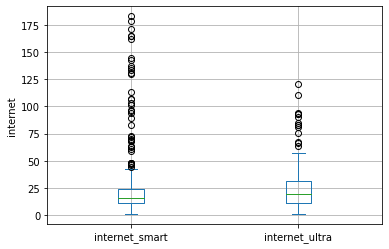

In [53]:
df_ = pd.DataFrame({"internet_smart": internet_smart, "internet_ultra": internet_ultra})
df_.plot.box(figsize=(6, 4), grid=True)
plt.ylabel("internet")
plt.show()

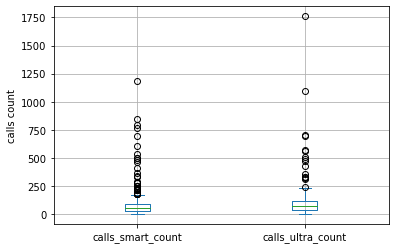

In [54]:
df_ = pd.DataFrame({"calls_smart_count": calls_smart_count, "calls_ultra_count": calls_ultra_count})
df_.plot.box(figsize=(6, 4), grid=True)
plt.ylabel("calls count")
plt.show()

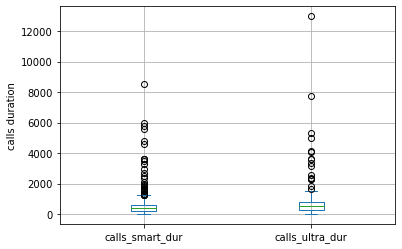

In [55]:
df_ = pd.DataFrame({"calls_smart_dur": calls_smart_dur, "calls_ultra_dur": calls_ultra_dur})
df_.plot.box(figsize=(6, 4), grid=True)
plt.ylabel("calls duration")
plt.show()

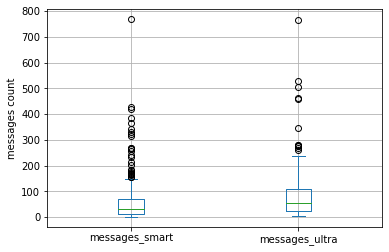

In [56]:
df_ = pd.DataFrame({"messages_smart": messages_smart, "messages_ultra": messages_ultra})
df_.plot.box(figsize=(6, 4), grid=True)
plt.ylabel("messages count")
plt.show()

В большенстве данных присутствуют выбросы, которые необходимо исключить для корректного анализа.
Для этого создадим ф-цию, испльзующую межквартильный размах

In [57]:
def func_iqr(x):
    q25 = x.quantile(.25)
    q75 = x.quantile(.75)
    iqr = q75 - q25
    lower = q25 - 1.5 * iqr
    upper = q75 + 1.5 * iqr
    y = x[(x > lower) & (x < upper)]
    return y

получим очищенные данные

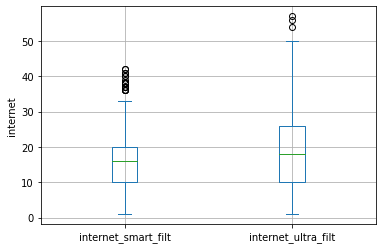

In [58]:
internet_smart_filt = func_iqr(internet_smart)
internet_ultra_filt = func_iqr(internet_ultra)
df_ = pd.DataFrame({"internet_smart_filt": internet_smart_filt, "internet_ultra_filt": internet_ultra_filt})
df_.plot.box(figsize=(6, 4), grid=True)
plt.ylabel("internet")
plt.show()

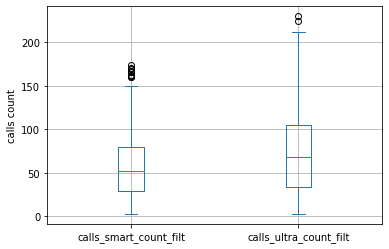

In [59]:
calls_smart_count_filt = func_iqr(calls_smart_count)
calls_ultra_count_filt = func_iqr(calls_ultra_count)
df_ = pd.DataFrame({"calls_smart_count_filt": calls_smart_count_filt, "calls_ultra_count_filt": calls_ultra_count_filt})
df_.plot.box(figsize=(6, 4), grid=True)
plt.ylabel("calls count")
plt.show()

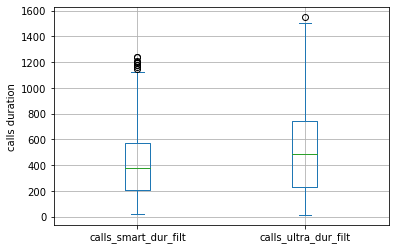

In [60]:
calls_smart_dur_filt = func_iqr(calls_smart_dur)
calls_ultra_dur_filt = func_iqr(calls_ultra_dur)
df_ = pd.DataFrame({"calls_smart_dur_filt": calls_smart_dur_filt, "calls_ultra_dur_filt": calls_ultra_dur_filt})
df_.plot.box(figsize=(6, 4), grid=True)
plt.ylabel("calls duration")
plt.show()

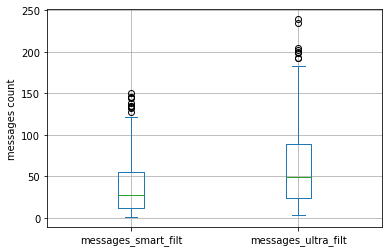

In [61]:
messages_smart_filt = func_iqr(messages_smart)
messages_ultra_filt = func_iqr(messages_ultra)
df_ = pd.DataFrame({"messages_smart_filt": messages_smart_filt, "messages_ultra_filt": messages_ultra_filt})
df_.plot.box(figsize=(6, 4), grid=True)
plt.ylabel("messages count")
plt.show()

примечание: выбросы в данных, появляющиеся на графиках после очистки, не должны смущать, так как они относятся к новым наборам данных и не имеют отношения к первоначально очищаемым

### Среднее

In [62]:
print('\033[1m' + 'Среднее количество интернет-трафика в Гб (smart):', '\033[0m', np.ceil(internet_smart_filt.mean()))
print('\033[1m' + 'Среднее количество интернет-трафика в Гб (ultra):', '\033[0m', np.ceil(internet_ultra_filt.mean()))
print()
print('\033[1m' + 'Среднее количество звонков (smart):', '\033[0m', np.ceil(calls_smart_count_filt.mean()))
print('\033[1m' + 'Среднее количество звонков (ultra):', '\033[0m', np.ceil(calls_ultra_count_filt.mean()))
print()
print('\033[1m' + 'Среднее продолж-ть голосового трафика (smart):', '\033[0m', np.ceil(calls_smart_dur_filt.mean()))
print('\033[1m' + 'Среднее продолж-ть голосового трафика (ultra):', '\033[0m', np.ceil(calls_ultra_dur_filt.mean()))
print()
print('\033[1m' + 'Среднее кол-во СМС (smart):', '\033[0m', np.ceil(messages_smart_filt.mean()))
print('\033[1m' + 'Среднее кол-во СМС (smart):', '\033[0m', np.ceil(messages_ultra_filt.mean()))

Среднее количество интернет-трафика в Гб (smart):  17.0
Среднее количество интернет-трафика в Гб (ultra):  20.0

Среднее количество звонков (smart):  59.0
Среднее количество звонков (ultra):  74.0

Среднее продолж-ть голосового трафика (smart):  417.0
Среднее продолж-ть голосового трафика (ultra):  518.0

Среднее кол-во СМС (smart):  39.0
Среднее кол-во СМС (smart):  65.0


### Дисперсия

In [63]:
print('\033[1m' + 'Дисперсия для интернет-трафика в Гб (smart):', '\033[0m', np.ceil(np.var(internet_smart_filt)))
print('\033[1m' + 'Дисперсия для интернет-трафика в Гб (ultra):', '\033[0m', np.ceil(np.var(internet_ultra_filt)))
print()
print('\033[1m' + 'Дисперсия для кол-ва звонков (smart):', '\033[0m', np.ceil(np.var(calls_smart_count_filt)))
print('\033[1m' + 'Дисперсия для кол-ва звонков (ultra):', '\033[0m', np.ceil(np.var(calls_ultra_count_filt)))
print()
print('\033[1m' + 'Дисперсия для голосового трафика (smart):', '\033[0m', np.ceil(np.var(calls_smart_dur_filt)))
print('\033[1m' + 'Дисперсия для голосового трафика (ultra):', '\033[0m', np.ceil(np.var(calls_ultra_dur_filt)))
print()
print('\033[1m' + 'Дисперсия для СМС (smart):', '\033[0m', np.ceil(np.var(messages_smart_filt)))
print('\033[1m' + 'Дисперсия для СМС (smart):', '\033[0m', np.ceil(np.var(messages_ultra_filt)))

Дисперсия для интернет-трафика в Гб (smart):  80.0
Дисперсия для интернет-трафика в Гб (ultra):  149.0

Дисперсия для кол-ва звонков (smart):  1474.0
Дисперсия для кол-ва звонков (ultra):  2369.0

Дисперсия для голосового трафика (smart):  75534.0
Дисперсия для голосового трафика (ultra):  111448.0

Дисперсия для СМС (smart):  1190.0
Дисперсия для СМС (smart):  3264.0


### Стандартное отклонение

In [64]:
print('\033[1m' + 'Ст.отклонение для интернет-трафика в Гб (smart):', '\033[0m', np.ceil(np.std(internet_smart_filt)))
print('\033[1m' + 'Ст.отклонение для интернет-трафика в Гб (ultra):', '\033[0m', np.ceil(np.std(internet_ultra_filt)))
print()
print('\033[1m' + 'Ст.отклонение для кол-ва звонков (smart):', '\033[0m', np.ceil(np.std(calls_smart_count_filt)))
print('\033[1m' + 'Ст.отклонение для кол-ва звонков (ultra):', '\033[0m', np.ceil(np.std(calls_ultra_count_filt)))
print()
print('\033[1m' + 'Ст.отклонение для голосового трафика (smart):', '\033[0m', np.ceil(np.std(calls_smart_dur_filt)))
print('\033[1m' + 'Ст.отклонение для голосового трафика (ultra):', '\033[0m', np.ceil(np.std(calls_ultra_dur_filt)))
print()
print('\033[1m' + 'Ст.отклонение для СМС (smart):', '\033[0m', np.ceil(np.std(messages_smart_filt)))
print('\033[1m' + 'Ст.отклонение для СМС (smart):', '\033[0m', np.ceil(np.std(messages_ultra_filt)))

Ст.отклонение для интернет-трафика в Гб (smart):  9.0
Ст.отклонение для интернет-трафика в Гб (ultra):  13.0

Ст.отклонение для кол-ва звонков (smart):  39.0
Ст.отклонение для кол-ва звонков (ultra):  49.0

Ст.отклонение для голосового трафика (smart):  275.0
Ст.отклонение для голосового трафика (ultra):  334.0

Ст.отклонение для СМС (smart):  35.0
Ст.отклонение для СМС (smart):  58.0


### Построение гистограмм

Сравнение интернет-трафика клиентов в месяц 


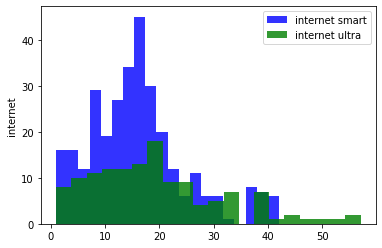

Сравнение кол-ва звонков клиентов в месяц 


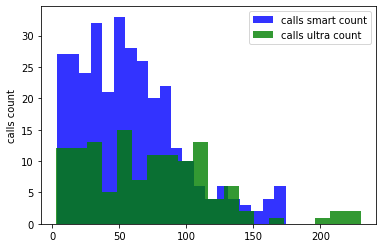

Сравнение голосового трафика в минутах в месяц 


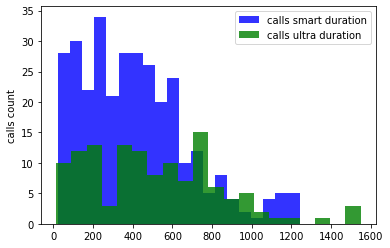

Сравнение кол-ва СМС клиентов в месяц 


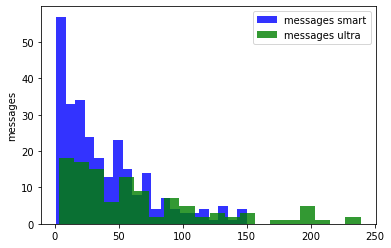

In [65]:
print('\033[1m' + 'Сравнение интернет-трафика клиентов в месяц', '\033[0m')
internet_smart_filt.plot(kind='hist', histtype='barstacked', bins=20, linewidth=5, color='b',
                         label='internet smart', legend=True, alpha=.8)
internet_ultra_filt.plot(kind='hist', histtype='barstacked', bins=20, linewidth=5, color='g',
                         label='internet ultra', legend=True, alpha=.8)
plt.ylabel("internet")
plt.show()
#--------------------------------------------------------------------------------------------------
print('\033[1m' + 'Сравнение кол-ва звонков клиентов в месяц', '\033[0m')
calls_smart_count_filt.plot(kind='hist', histtype='barstacked', bins=20, linewidth=5, color='b',
                            label='calls smart count', legend=True, alpha=.8)
calls_ultra_count_filt.plot(kind='hist', histtype='barstacked', bins=20, linewidth=5, color='g',
                            label='calls ultra count', legend=True, alpha=.8)
plt.ylabel("calls count")
plt.show()
#--------------------------------------------------------------------------------------------------
print('\033[1m' + 'Сравнение голосового трафика в минутах в месяц', '\033[0m')
calls_smart_dur_filt.plot(kind='hist', histtype='barstacked', bins=20, linewidth=5, color='b',
                            label='calls smart duration', legend=True, alpha=.8)
calls_ultra_dur_filt.plot(kind='hist', histtype='barstacked', bins=20, linewidth=5, color='g',
                            label='calls ultra duration', legend=True, alpha=.8)
plt.ylabel("calls count")
plt.show()
#--------------------------------------------------------------------------------------------------
print('\033[1m' + 'Сравнение кол-ва СМС клиентов в месяц', '\033[0m')
messages_smart_filt.plot(kind='hist', histtype='barstacked', bins=20, linewidth=5, color='b',
                         label='messages smart', legend=True, alpha=.8)
messages_ultra_filt.plot(kind='hist', histtype='barstacked', bins=20,linewidth=5, color='g',
                         label='messages ultra', legend=True, alpha=.8)
plt.ylabel("messages")
plt.show()

**Вывод:**

в данных обнаружены выбросы, которые для анализа показателей были исключены при использовании межквартильного размаха

* среднее количество интернет-трафика в Гб (**Smart**):  104.0
* среднее количество интернет-трафика в Гб (**Ultra**):  128.0


* Среднее количество звонков (**Smart**):  372.0
* Среднее количество звонков (**Ultra**):  481.0


* Среднее продолж-ть голосового трафика (**Smart**):  2653.0
* Среднее продолж-ть голосового трафика (**Ultra**):  3444.0


* Среднее кол-во СМС (**Smart**):  224.0
* Среднее кол-во СМС (**Ultra**):  331.0


* Дисперсия для интернет-трафика в Гб (**Smart**):  3615.0
* Дисперсия для интернет-трафика в Гб (**Ultra**):  6691.0


* Дисперсия для кол-ва звонков (**Smart**):  57601.0
* Дисперсия для кол-ва звонков (**Ultra**):  108187.0


* Дисперсия для голосового трафика (**Smart**):  2942967.0
* Дисперсия для голосового трафика (**Ultra**):  5478046.0


* Дисперсия для СМС (**Smart**):  34894.0
* Дисперсия для СМС (**Ultra**):  57795.0


* Ст.отклонение для интернет-трафика в Гб (**Smart**):  61.0
* Ст.отклонение для интернет-трафика в Гб (**Ultra**):  82.0


* Ст.отклонение для кол-ва звонков (**Smart**):  241.0
* Ст.отклонение для кол-ва звонков (**Ultra**):  329.0


* Ст.отклонение для голосового трафика (**Smart**):  1716.0
* Ст.отклонение для голосового трафика (**Ultra**):  2341.0


* Ст.отклонение для СМС (**Smart**):  187.0
* Ст.отклонение для СМС (**Ultra**):  241.0


Потребления объема услуг в тарифе **Ultra** больше, чем в тарифе **Smart**.
Изменчивость в тарифе **Ultra** наблюдается также на более высоком уровне, чем в тарифе **Smart**


## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

$Н_{0}$ - нулевая гипотеза: средние выручки не отличаются

$Н_{1}$ - отличаются

Исходя из верности $Н_{0}$ для тарифа "Ультра" расчитаем вероятность появления среднего значения выручки тарифа "Смарт" в соответствующем распределении тарифа "Ультра".

Отметим, что данные выборки являются независимыми - набора данных о клиентах двух рогрупп (кластеров) клиентов разных тарифов за отчетный период.

Возьмем пороговый уровень значимости за 1%

Также будем исходить из неравенства дисперсий выборок

In [66]:
ultra_mean_sample = df_costs.query('tariff == "ultra"')['mean_by_month']
smart_mean_sample = df_costs.query('tariff == "smart"')['mean_by_month']

print('Дисперсия для "ultra"', np.var(ultra_mean_sample, ddof=1))
print('Дисперсия для "smart"', np.var(smart_mean_sample, ddof=1))

alpha = 0.01

result = st.ttest_ind(ultra_mean_sample, smart_mean_sample, equal_var = False) # дисперсии не равны
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Вероятность равна ", result.pvalue)
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия для "ultra" 91671.29185561385
Дисперсия для "smart" 367526.50476190494
Отвергаем нулевую гипотезу. Вероятность равна  1.1661931155633929e-59


Это означает, что, если бы распределения были одинаковыми, то вероятность выпадания значения среднего из второй выборки стремилось бы к вероятности выпадания среднего первой выборки. На практике имеем, что эта вероятность исчезающе мала: 1.17*$10^{-59}$ и ниже даже установленного достаточно строгово уровня значимости в 1%

Таким образом можно сделать вывод о значительно более вероятной верности второй гепотизы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

### Средняя выручка клиентов из Москвы отличается от выручки клиентов из других регионов

$Н_{0}$ - нулевая гипотеза: средние выручки Москвы и регионов не отличаются

$Н_{1}$ - отличаются

Исходя из верности $Н_{0}$ для московских клиентов расчитаем вероятность появления среднего значения выручки клиентов из регионов в соответствующем распределении московских клиентов.

Отметим, что данные выборки также являются независимыми  - набора данных о клиентах двух географических макрогрупп (кластеров) за отчетный период.

Возьмем пороговый уровень значимости за 1%

Также будем исходить из неравенства дисперсий выборок

In [67]:
capital_sample = df_costs.query('city == "Москва"')['mean_by_month']
noncapital_sample = df_costs.query('tariff != "Москва"')['mean_by_month']

print('Дисперсия для "ultra"', np.var(capital_sample, ddof=1))
print('Дисперсия для "smart"', np.var(noncapital_sample, ddof=1))

alpha = 0.01

result = st.ttest_ind(capital_sample, noncapital_sample, equal_var = False) # дисперсии не равны по умолчанию
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Вероятность равна ", result.pvalue)
else:
    print("Не получилось отвергнуть нулевую гипотезу. Вероятность равна ", result.pvalue)

Дисперсия для "ultra" 368061.2890125749
Дисперсия для "smart" 408160.48389178293
Не получилось отвергнуть нулевую гипотезу. Вероятность равна  0.43546250637163575


Если указать равенство дисперсий, то пулчаем большую вероятность

In [68]:
result = st.ttest_ind(capital_sample, noncapital_sample, equal_var = True) # дисперсии равны
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Вероятность равна ", result.pvalue)
else:
    print("Не получилось отвергнуть нулевую гипотезу. Вероятность равна ", result.pvalue)

Не получилось отвергнуть нулевую гипотезу. Вероятность равна  0.4502955496654081


В данном случае мы не имеем права отвергнуть $Н_{0}$ о различии средних тратах клиентов на связь в столичном регионе и других регионах, так как вероятность выпадания среднего из второй выборки по распределению первой выборки ≈43,5% (или ≈45% при введении равенстве дисперсий во время расчета), что говорит о приблизитель равном распределении трат клиентов сотовой компаниии вне зависимости от регионального разделения

**Вывод:**

1. Средняя выручка тарифов **Ultra** и **Smart** отличаются в пользу первого, что наглядно показано в результате стат.анализа при выборе строгово уровня значимости в 1%
2. Средняя выручка в московском регионе и других регионах мало отличимы, так как вероятность соответствия составила значительно больше порогового уровня значимости

## Общий вывод:

- представлены 5 файлов
- дубликаты отсутствуют
- в фале пользователей отсутствуют данные о дате окончании пользования услугами

**Анализ данных и предобработка**
- заполнены пропуски
- из 500 клиентов 38 отказались от услуг
- 462 на конец 2018г. продолжают пользоваться услугами
- все были зарегистрированы в 2018 году
- 1,6% не пользовались звонками
- 0,6% клиента не пользовались интернетом
- 14,8%  не пользовались СМС
- среднее кол-во звонков в месяц: 412
- среднея продолжительность звонков в месяц: 2948
- среднее кол-во СМС в месяц: 289
- среднее кол-во интернет-трафика в Гб в месяц: 112

**Траты клиентов**
- определены траты клиентов сверх тарифа по категориям связи
- определена помесячная выручка:
- для тарифа Смарт – 8171р.
- для тарифа Ультра - 13692

**Среднее потребление услуг**
- среднее количество звонков для тарифа **Smart** 374 
- среднее количество звонков для тарифа **Ultra** 506


- среднее количество минут голосового трафика для тарифа **Smart** 2670
- среднее количество минут голосового трафика для тарифа **Ultra** 3628


- среднее количество SMS для тарифа **Smart** 247
- среднее количество SMS для тарифа **Ultra** 393


- среднее количество интернет- трафика в Гб для тарифа **Smart** 104Гб
- среднее количество интернет- трафика в Гб для тарифа **Ultra** 131Гб



**Средняя выручка и региональное разбиение**
- средняя выручка тарифов **Ultra** и **Smart** отличаются в пользу первого, что наглядно показано в результате стат.анализа при выборе строгово уровня значимости в 1%
- средняя выручка в московском регионе и других регионах мало отличимы, так как вероятность соответствия составила значительно больше порогового уровня значимости
